EDA Problem Statement
Before building a predictive model, it is crucial to explore and understand the structure, distribution, and relationships within the dataset. This includes identifying patterns, trends, and potential anomalies that could impact a student’s math score.

EDA Objective
To perform exploratory data analysis on student performance data in order to:

Understand the distribution of math scores.

Analyze the relationship between math scores and features like gender, parental education, lunch type, and test preparation.

Detect missing values, outliers, or skewed distributions.

Identify important variables that could influence math performance and prepare the data for modeling.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv(r"C:\Users\ayush\OneDrive\Desktop\student.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

Checking the null values

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Checking any duplicate value

In [8]:
df.duplicated().sum()

0

Checking the data types of features

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


INSIGHT:
-From above description of numerical data ,all means are very close to each other : between 66 and 68
-All standard deviations are also close : between 14.6 and 15.2
-Minimum Score for Maths is 0 while for Readind and writing are 17 and 10

Uniques values of different features

In [13]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())

print("categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:   ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:   ['none' 'completed']


Defining Numerical and Categorical columns

In [14]:
num_features=[feature for feature in df.columns if df[feature].dtype != 'O']
cat_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print("we have {} numerical features : {}".format(len(num_features), num_features))
print("\nwe have {} categorical features : {}".format(len(cat_features), cat_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Addinf columns for "Total Score" and "Average Score"

In [18]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_acore,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333


In [19]:
df.drop('total_acore',axis=1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [23]:
reading_full=df[df['reading_score']==100]['average_score'].count()
print("Number of students with full marks in reading :",reading_full)

writing_full=df[df['writing_score']==100]['writing_score'].count()
print("Number of students with full marks in writing :",writing_full)

math_full=df[df['math_score']==100]['average_score'].count()
print("Number of students with full marks in math :",math_full)

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in math : 7


In [24]:
reading_less_33=df[df['reading_score'] <= 33]['average_score'].count()
print("Number of students with less than 33 marks in reading: ",reading_less_33)

writing_less_33=df[df['writing_score'] <= 33]['average_score'].count()
print("Number of students with less than 33 marks in writing: ",writing_less_33)

math_less_33=df[df['math_score'] <= 33]['average_score'].count()
print("Number of students with less than 33 marks in math: ",math_less_33)

Number of students with less than 33 marks in reading:  11
Number of students with less than 33 marks in writing:  14
Number of students with less than 33 marks in math:  20


INSIGHT
-From above values we get students have performed worst in Maths
-Best Performance is in Reading

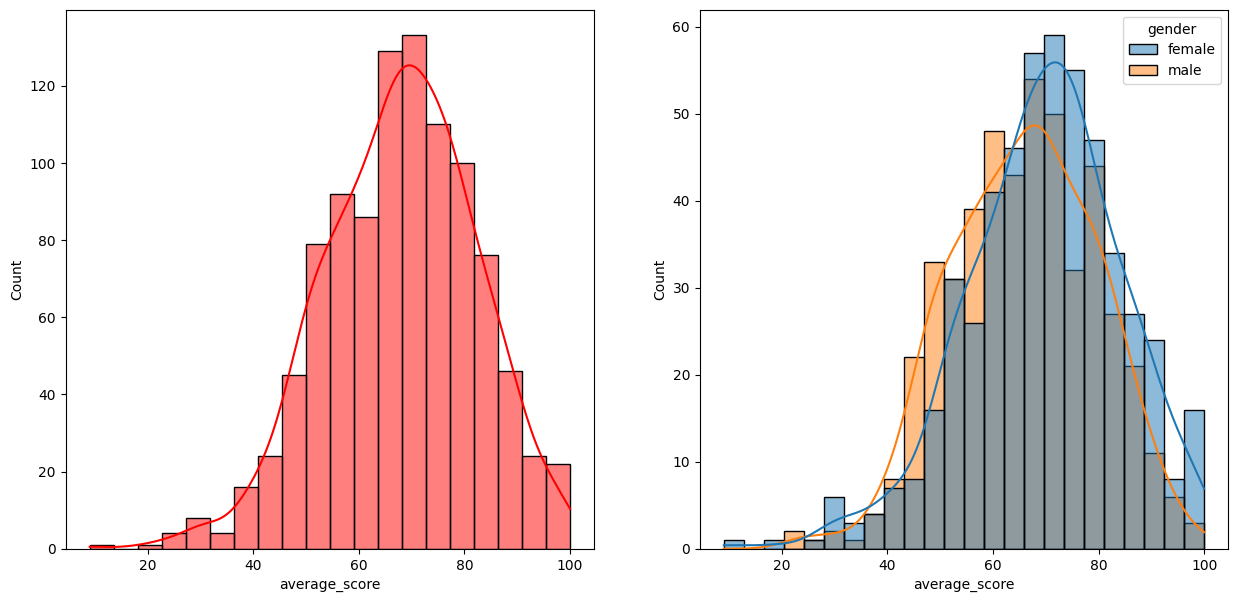

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=20,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

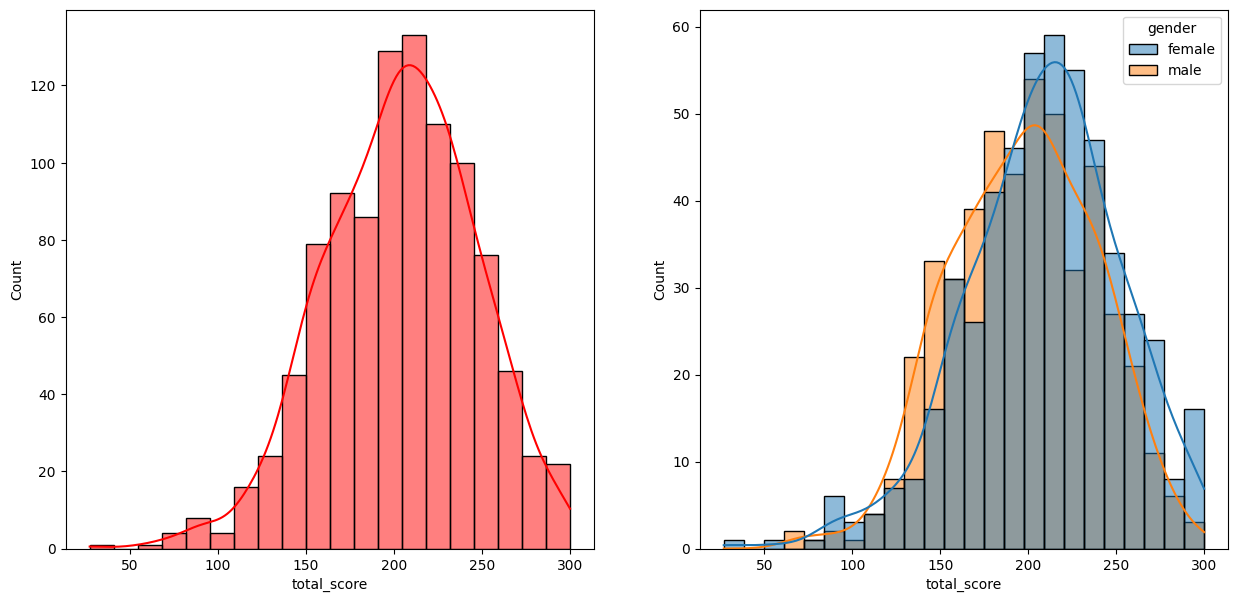

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=20,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

INSIGHT
-Females performed better than males